# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [5]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-2]
regularization_strengths = [1e-5]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for l in learning_rates:
    for r in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=l, num_iters=1500)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        train_acc = np.mean(y_train == y_train_pred)
        validation_acc = np.mean(y_val == y_val_pred)
        
        results[(l, r)] = (train_acc, validation_acc)
        
        if validation_acc > best_val:
            best_val = validation_acc
            best_svm = svm
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-02 reg 1.000000e-05 train accuracy: 0.508612 val accuracy: 0.488000
best validation accuracy achieved during cross-validation: 0.488000


In [6]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.494


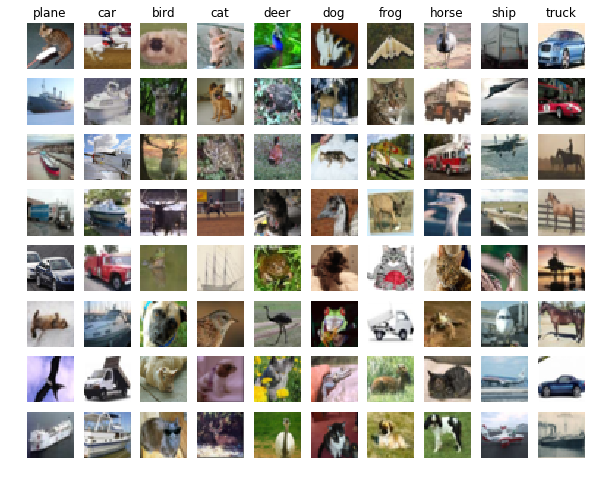

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

The misclassifications share features in common with typical pictures for each of the guessed classes. For example, the plane misclassifications tend to have blue/white background (i.e. the sky) with an object in the middle of the screen. And for car, there are lots of trucks misclassified as cars, which makes sense given their visual similiarities.

In all cases, the colors and textures/shapes in the misclassifies images do seem to generally match what's expected for each class from a color and texture perspective, which makes sense given that we used HOG and color histograms as features.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [4]:
print(X_train_feats.shape)

(49000, 155)


In [5]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_net = None # store the best model into this 
best_stats = {}

#hyperparameters
learning_rates = np.linspace(4e-1, 6e-1, num=10)
regularization_strengths = [1e-4] #np.linspace(1e-5, 1e-4, num=10) # [1e-5]
batch = 200 # smaller batch size = more epochs, larger = fewer epochs; learning rate decays after each epoch

decay = [0.95] # can get good performance without varying this though
iters = 1000 # fixed for a given run

for l in learning_rates:
    for r in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
          num_iters=iters, batch_size=batch,
          learning_rate=l, learning_rate_decay=decay[0],
          reg=r, verbose=False)
        
        y_train_pred = net.predict(X_train_feats)
        y_val_pred = net.predict(X_val_feats)
        train_acc = np.mean(y_train == y_train_pred)
        validation_acc = np.mean(y_val == y_val_pred)
        
        results[(l, r)] = (train_acc, validation_acc)
        
        if validation_acc > best_val:
            best_val = validation_acc
            best_net = net
            best_stats = stats
            
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

lr 4.000000e-01 reg 1.000000e-04 train accuracy: 0.616592 val accuracy: 0.569000
lr 4.222222e-01 reg 1.000000e-04 train accuracy: 0.619633 val accuracy: 0.565000
lr 4.444444e-01 reg 1.000000e-04 train accuracy: 0.624531 val accuracy: 0.573000
lr 4.666667e-01 reg 1.000000e-04 train accuracy: 0.633531 val accuracy: 0.568000
lr 4.888889e-01 reg 1.000000e-04 train accuracy: 0.633633 val accuracy: 0.570000
lr 5.111111e-01 reg 1.000000e-04 train accuracy: 0.643633 val accuracy: 0.571000
lr 5.333333e-01 reg 1.000000e-04 train accuracy: 0.643776 val accuracy: 0.583000
lr 5.555556e-01 reg 1.000000e-04 train accuracy: 0.639939 val accuracy: 0.573000
lr 5.777778e-01 reg 1.000000e-04 train accuracy: 0.649939 val accuracy: 0.588000
lr 6.000000e-01 reg 1.000000e-04 train accuracy: 0.656082 val accuracy: 0.595000
best validation accuracy achieved during cross-validation: 0.595000


In [6]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.566


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Look at the performance of HOG by itself vs. Color histogram by itself vs. Hog + Histogram

I explored the performance of the features we looked at in this exercise (HOG and color histograms) separately to see how well they work when not combined.

In [4]:
from cs231n.features import *

# Extract just the HOG, cross-validate the hyperparameters, and report out validation and training accuracy
feature_fns = [hog_feature]
X_train_feats2 = extract_features(X_train, feature_fns, verbose=True)
X_val_feats2 = extract_features(X_val, feature_fns)
X_test_feats2 = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean value
mean_feat2 = np.mean(X_train_feats2, axis=0, keepdims=True)
X_train_feats2 -= mean_feat2
X_val_feats2 -= mean_feat2
X_test_feats2 -= mean_feat2

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat2 = np.std(X_train_feats2, axis=0, keepdims=True)
X_train_feats2 /= std_feat2
X_val_feats2 /= std_feat2
X_test_feats2 /= std_feat2

# Preprocessing: Add a bias dimension
X_train_feats2 = np.hstack([X_train_feats2, np.ones((X_train_feats2.shape[0], 1))])
X_val_feats2 = np.hstack([X_val_feats2, np.ones((X_val_feats2.shape[0], 1))])
X_test_feats2 = np.hstack([X_test_feats2, np.ones((X_test_feats2.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [43]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats2.shape[1]
hidden_dim = 500
num_classes = 10

results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_net2 = None # store the best model into this 
best_stats = {}

#hyperparameters
learning_rates = np.linspace(1e-1, 1, num=5)
regularization_strengths = [0.0]
batch = 100 # smaller batch size = more epochs, larger = fewer epochs; learning rate decays after each epoch

decay = [0.95] # can get good performance without varying this though
iters = 1000 # fixed for a given run

for l in learning_rates:
    for r in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        
        stats = net.train(X_train_feats2, y_train, X_val_feats2, y_val,
          num_iters=iters, batch_size=batch,
          learning_rate=l, learning_rate_decay=decay[0],
          reg=r, verbose=False)
        
        y_train_pred = net.predict(X_train_feats2)
        y_val_pred = net.predict(X_val_feats2)
        train_acc = np.mean(y_train == y_train_pred)
        validation_acc = np.mean(y_val == y_val_pred)
        
        results[(l, r)] = (train_acc, validation_acc)
        
        if validation_acc > best_val:
            best_val = validation_acc
            best_net2 = net
            best_stats = stats
            
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-01 reg 0.000000e+00 train accuracy: 0.494286 val accuracy: 0.496000
lr 3.250000e-01 reg 0.000000e+00 train accuracy: 0.560122 val accuracy: 0.509000
lr 5.500000e-01 reg 0.000000e+00 train accuracy: 0.581102 val accuracy: 0.518000
lr 7.750000e-01 reg 0.000000e+00 train accuracy: 0.591265 val accuracy: 0.504000
lr 1.000000e+00 reg 0.000000e+00 train accuracy: 0.596776 val accuracy: 0.526000
best validation accuracy achieved during cross-validation: 0.526000


In [47]:
# Run neural net classifier on the test set
y_test_pred2 = best_net2.predict(X_test_feats2) 
test_acc = (y_test_pred2 == y_test).mean()
print(test_acc)

0.525


When running just HOG, with some hyperparameter searching we can get a validation accuracy of 0.53 and test set accuracy of 0.53. To compare, when running both HOG and color histograms, we got a validation accuracy of .595 and test accuracy of .566 (and these were not heavily optimized so it would easily have been possible to get more). 

Now, let's repeat the exercise but only looking at the color histogram.

In [38]:
# Extract just the color histogram, cross-validate the hyperparameters, and report out validation and training accuracy
num_color_bins=10
feature_fns = [lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats3 = extract_features(X_train, feature_fns, verbose=True)
X_val_feats3 = extract_features(X_val, feature_fns)
X_test_feats3 = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat3 = np.mean(X_train_feats3, axis=0, keepdims=True)
X_train_feats3 -= mean_feat3
X_val_feats3 -= mean_feat3
X_test_feats3 -= mean_feat3

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat3 = np.std(X_train_feats3, axis=0, keepdims=True)
X_train_feats3 /= std_feat3
X_val_feats3 /= std_feat3
X_test_feats3 /= std_feat3

# Preprocessing: Add a bias dimension
X_train_feats3 = np.hstack([X_train_feats3, np.ones((X_train_feats3.shape[0], 1))])
X_val_feats3 = np.hstack([X_val_feats3, np.ones((X_val_feats3.shape[0], 1))])
X_test_feats3 = np.hstack([X_test_feats3, np.ones((X_test_feats3.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [45]:
input_dim = X_train_feats3.shape[1]
hidden_dim = 500
num_classes = 10

results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_net3 = None # store the best model into this 
best_stats = {}

#hyperparameters
learning_rates = np.linspace(1e-2, 1, num=10)
regularization_strengths = [0.0]
batch = 200 # smaller batch size = more epochs, larger = fewer epochs; learning rate decays after each epoch

decay = [0.9] # can get good performance without varying this though
iters = 1000 # fixed for a given run

for l in learning_rates:
    for r in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        
        stats = net.train(X_train_feats3, y_train, X_val_feats3, y_val,
          num_iters=iters, batch_size=batch,
          learning_rate=l, learning_rate_decay=decay[0],
          reg=r, verbose=False)
        
        y_train_pred = net.predict(X_train_feats3)
        y_val_pred = net.predict(X_val_feats3)
        train_acc = np.mean(y_train == y_train_pred)
        validation_acc = np.mean(y_val == y_val_pred)
        
        results[(l, r)] = (train_acc, validation_acc)
        
        if validation_acc > best_val:
            best_val = validation_acc
            best_net3 = net
            best_stats = stats
            
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-02 reg 0.000000e+00 train accuracy: 0.100265 val accuracy: 0.087000
lr 1.200000e-01 reg 0.000000e+00 train accuracy: 0.219429 val accuracy: 0.243000
lr 2.300000e-01 reg 0.000000e+00 train accuracy: 0.237265 val accuracy: 0.273000
lr 3.400000e-01 reg 0.000000e+00 train accuracy: 0.249510 val accuracy: 0.291000
lr 4.500000e-01 reg 0.000000e+00 train accuracy: 0.260694 val accuracy: 0.273000
lr 5.600000e-01 reg 0.000000e+00 train accuracy: 0.265184 val accuracy: 0.304000
lr 6.700000e-01 reg 0.000000e+00 train accuracy: 0.262306 val accuracy: 0.261000
lr 7.800000e-01 reg 0.000000e+00 train accuracy: 0.267918 val accuracy: 0.276000
lr 8.900000e-01 reg 0.000000e+00 train accuracy: 0.260633 val accuracy: 0.264000
lr 1.000000e+00 reg 0.000000e+00 train accuracy: 0.273000 val accuracy: 0.281000
best validation accuracy achieved during cross-validation: 0.304000


In [50]:
# Run neural net classifier on the test set
y_test_pred3 = best_net3.predict(X_test_feats3) 
test_acc = (y_test_pred3 == y_test).mean()
print(test_acc)

0.272


The color histogram appears to perform worse on its own than HOG. With some hyperparameter searching we see a validation accuracy of around 0.3 and test accuracy of around 0.27. This seems to indicate that the texture of an image is more representative of it's class than just the colors. Intuitively this makes sense - images can have similar colors but be very different in content (e.g. a blue sky with a plane vs. the ocean with a boat), but textures will tend to be more aligned (although there are problem cases with just textures such as animals looking roughly similar to each other).

**Summarizing the results**:

* Only HOG
    * Validation accuracy: 0.53
    * Test accuracy: 0.53
* Only color histogram
    * Validation accuracy: 0.30
    * Test accuracy: 0.27
* HOG + color histogram
    * Validation accuracy: 0.595
    * Test accuracy: 0.566

We can see that HOG by itself performs quite well - comparable to the SVM performance if we ran the SVM with both HOG and color histogram, and better than our neural network (from the previous exercise in the assignment) that only used pixels.

As one final investigation, let's look at some misclassified examples for HOG only vs. color histogram only:

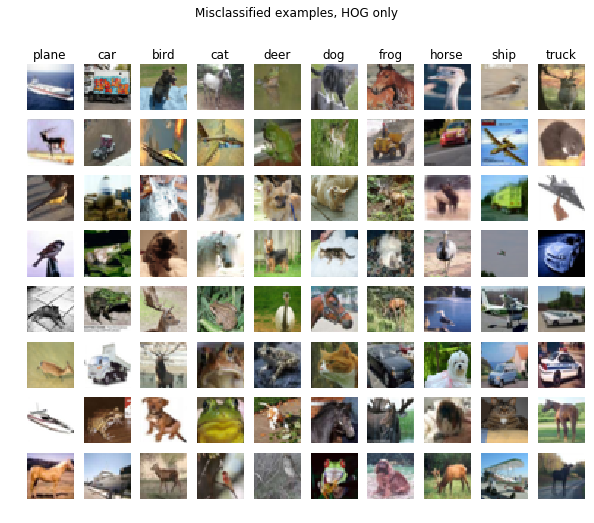

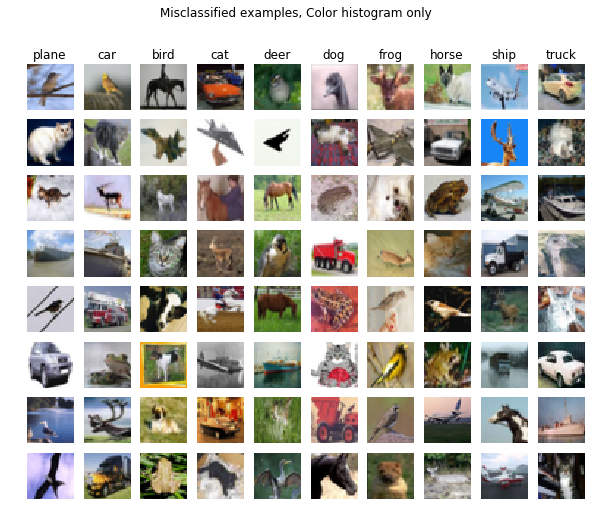

In [54]:
# misclassified examples for HOG-only
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred2 == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.suptitle('Misclassified examples, HOG only')
plt.show()

# misclassified examples for color histogram only
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred3 == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.suptitle('Misclassified examples, Color histogram only')
plt.show()

This lines up with the intuition around what the two features are trying to do. The misclassifications for color histogram only (second image) all seem to have a similar color distribution (e.g. the ship and plane column have lots of blues, the deer and frog columns have lighter/greener colors, etc.). It's harder to tell exactly what pattern the misclassifications for HOG follow, only that it doesn't seem to be as strongly color-centric (which makes sense given how the feature was defined). 

Comparing the HOG misclassifications with the HOG + color histogram misclassifications, it generally looks like the colors are more in lione in the combined output than in just HOG. Again, this makes sense since adding color histograms as a feature allowed colors to be weighted. Intuitively, the reason why HOG + color histogram performs better than just HOG is likely due to the fact that images of similar color AND texture are more similar than images of just the same texture.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!


# Bonus 1: Concentric circle data sets to test how the number of units in the hidden layer affects model performance

One of the articles linked from Piazza talked about how a network with 2 hidden units does not have the capacity to properly classify a dataset with concentric circles, but that a network with 3 hidden units would be able to classify this. I wanted to examine this more empirically to better understanding the intuition.

A fair amount of the code comes from the toy example on spiral classification in the lecture notes. My main work was to construct a circle dataset and run through the exercises to see how the results would unfold on this data. The dataset consists of 3 concentric circles centered around the origin with different radii. I added in a bit of noise instead of drawing perfect circles.

Article in question: http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/


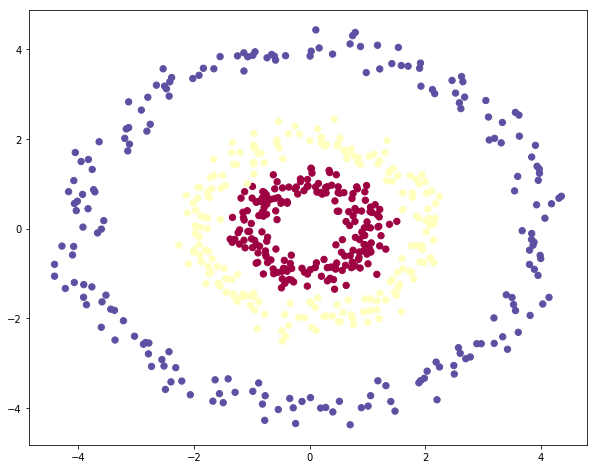

In [10]:
import random, math
import numpy as np
import matplotlib.pyplot as plt

# First, construct a dataset of 3 classes that are concentric circles around each other
N = 200 # number of points for each class
D = 2
radii = [1.0, 2.0, 4.0]
K = len(radii)
pi = math.pi

X = np.zeros((N*K,D)) # data matrix
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  value_range = range(N*j,N*(j+1))
  r = radii[j]
    
  # create 3 concentric circles with some noise
  theta = 0.2
  X[value_range] = [(math.cos(2*pi/N*x)*r,math.sin(2*pi/N*x)*r) for x in range(0,N)]
  X[value_range] += np.array([np.random.randn(N)*theta, np.random.randn(N)*theta]).T
    
  y[value_range] = j
# visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [11]:
# First, let's train a simple SVM and see how well it does
from cs231n.classifiers import LinearSVM
svm = LinearSVM()

loss_hist = svm.train(X, y, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)

iteration 0 / 1500: loss 2.190020
iteration 100 / 1500: loss 2.069787
iteration 200 / 1500: loss 2.025587
iteration 300 / 1500: loss 2.009516
iteration 400 / 1500: loss 2.003575
iteration 500 / 1500: loss 2.001243
iteration 600 / 1500: loss 2.000435
iteration 700 / 1500: loss 2.000192
iteration 800 / 1500: loss 2.000060
iteration 900 / 1500: loss 2.000028
iteration 1000 / 1500: loss 2.000004
iteration 1100 / 1500: loss 2.000005
iteration 1200 / 1500: loss 1.999998
iteration 1300 / 1500: loss 2.000000
iteration 1400 / 1500: loss 2.000001


Loss converges to 2.0 very quickly. In lecture we learned that for SVMs you expect the loss at the start (when all the weights are close to 0) to be around N-1 (where N is the number of classes) since every example is going to have a loss of N-1 (the incorrect class scores are about equal to the correct class scores, so the loss per class per example is the threshold value of 1).

It's concerning that the loss "converges" to N-1. This is telling, indicating that we probably don't have a great solution to this problem with SVM. 

In [12]:
# Evaluate the training set accuracy and print the weights
y_train_pred = svm.predict(X)
print('training accuracy: %.2f' % (np.mean(y == y_train_pred)))

print(svm.W)

training accuracy: 0.34
[[  7.33482794e-07  -4.12925804e-07   8.64723705e-08]
 [ -3.99441344e-07  -5.90968876e-07   1.56485823e-06]]


This confirms the previously stated hypothesis. A loss of 2 here is what we'd see at the start of SVM when all of the possible outcomes are weighted equally and close to 0. Training accuracy of 0.33 corresponds exactly to random guessing (1/3 chance of being right). This makes sense intuitively, and it's cool to see the #'s show this as well! Now let's take a look at the decision boundary generated by the classifier:

(-5.3746015453725722, 5.4253984546271976)

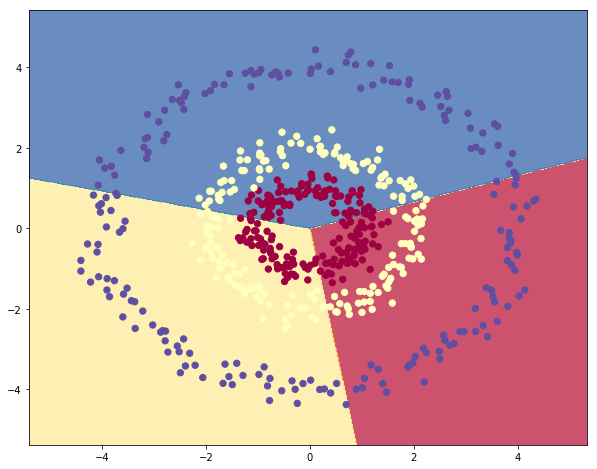

In [13]:
# plot the classifier
W = svm.W

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

SVM is limited to produce linear boundaries and it does exactly that. We can see that the data is divided 
basically into thirds. Now, let's see if we can do better with our two-layer neural network! First let's start with a hidden size of 1 unit.

In [14]:
from cs231n.classifiers.neural_net import TwoLayerNet

hidden_size = 1
net = TwoLayerNet(D, hidden_size, K)

# Train the network
# Given that this is a toy data set, the validation set is equal to the training set, so it is validating against itself
stats = net.train(X, y, X, y, learning_rate=1e-1,
            num_iters=1500, batch_size=D, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X) == y).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1500: loss 1.098612
iteration 100 / 1500: loss 1.098129
iteration 200 / 1500: loss 1.097631
iteration 300 / 1500: loss 1.199524
iteration 400 / 1500: loss 1.214538
iteration 500 / 1500: loss 1.039393
iteration 600 / 1500: loss 1.199667
iteration 700 / 1500: loss 1.150762
iteration 800 / 1500: loss 1.083298
iteration 900 / 1500: loss 0.957048
iteration 1000 / 1500: loss 0.529326
iteration 1100 / 1500: loss 0.254781
iteration 1200 / 1500: loss 1.124937
iteration 1300 / 1500: loss 1.325222
iteration 1400 / 1500: loss 0.895772
Validation accuracy:  0.456666666667


Interesting! Even with just one unit in the hidden layer we see some improvement over randomness. It's not great though. Let's see what the decision boundaries look like in this case to see how it's changing:

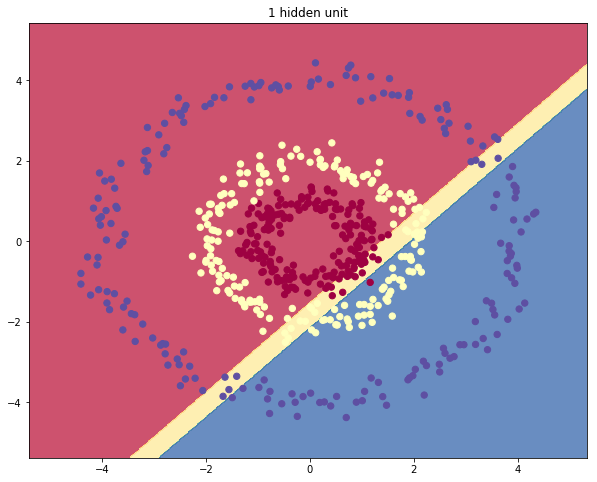

In [15]:
# plot the classifier
W1, b1 = net.params['W1'], net.params['b1']
W2, b2 = net.params['W2'], net.params['b2']

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('1 hidden unit')

Basically the network says "let's just make sure we almost always classify the red points correctly, almost completely ignore yellow, and classify everything else as blue."

Now let's continue adding in more units to the hidden layer to see how the decision boundary changes. Instead of continuing to iterate one by one and adding capacity to the hidden layer one unit at a time, I decided to do it all in one go to make it easier to browse. This was also an excuse to get some more practice with matplotlib :)

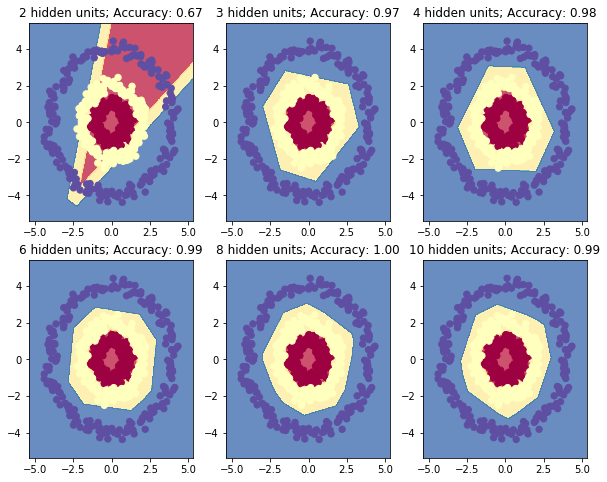

In [23]:
# GOAL: 2, 3, 4, 6, 8 , 10 hidden units with pictures and training accuracies
hidden_sizes = [2, 3, 4, 6, 8, 10]

# hidden_sizes = [2,3, 4, 6]
for idx, hid in enumerate(hidden_sizes):
    plt.subplot(2, 3, idx+1)
    
    #run the neural net
    net = TwoLayerNet(D, hid, K)  
    stats = net.train(X, y, X, y, learning_rate=1e-1, num_iters=15000, batch_size=D, reg=0.0)
    val_acc = (net.predict(X) == y).mean()
    
    # plot the classifier
    W1, b1 = net.params['W1'], net.params['b1']
    W2, b2 = net.params['W2'], net.params['b2']

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title('%d hidden units; Accuracy: %0.2f' %  (hid, val_acc))


These results line up with Chris Olah's blog post - with 2 hidden units the network does pretty well but cannot find the right way to split the data. However once you bump it up to 3 units, the network learns the concentric nature of the data and has nearly 100% accuracy. From this point on, adding more hidden units smoothens out some of the boundaries a bit but doesn't fundamentally change the discovered boundaries and the resulting accuracy is nearly perfect.